In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [224]:
columns = []

for line in open('Data/name of the animals.txt'):
    columns.append(line.split('\n')[0])

In [225]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
           padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    
    Dense(units=150, activation='relu'),
    Dense(units=90, activation='relu'),
    Dense(units=90, activation='softmax')
])


In [226]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [227]:
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'Data/animals',  # this is the target directory
        target_size=(224, 224),  
        batch_size=10,
        class_mode='categorical',
        subset='training')

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
        'Data/animals',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical',
        subset='validation') 

history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Epoch 1/50
432/432 [==============================] - 32s 72ms/step - loss: 4.5296 - accuracy: 0.0167 - val_loss: 4.4729 - val_accuracy: 0.0185
Epoch 2/50
432/432 [==============================] - 30s 69ms/step - loss: 4.4275 - accuracy: 0.0222 - val_loss: 4.3941 - val_accuracy: 0.0306
Epoch 3/50
432/432 [==============================] - 30s 69ms/step - loss: 4.3395 - accuracy: 0.0359 - val_loss: 4.3263 - val_accuracy: 0.0352
Epoch 4/50
432/432 [==============================] - 30s 70ms/step - loss: 4.2099 - accuracy: 0.0493 - val_loss: 4.2067 - val_accuracy: 0.0565
Epoch 5/50
432/432 [==============================] - 30s 69ms/step - loss: 4.0708 - accuracy: 0.0750 - val_loss: 4.1411 - val_accuracy: 0.0648
Epoch 6/50
432/432 [==============================] - 31s 71ms/step - loss: 3.8971 - accuracy: 0.0991 - val_loss: 4.0330 - val_accuracy: 0.0796
Epoch 7/50
432/432 [==============================

In [228]:
len(train_generator)

432

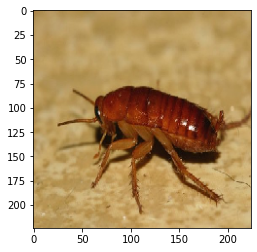

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


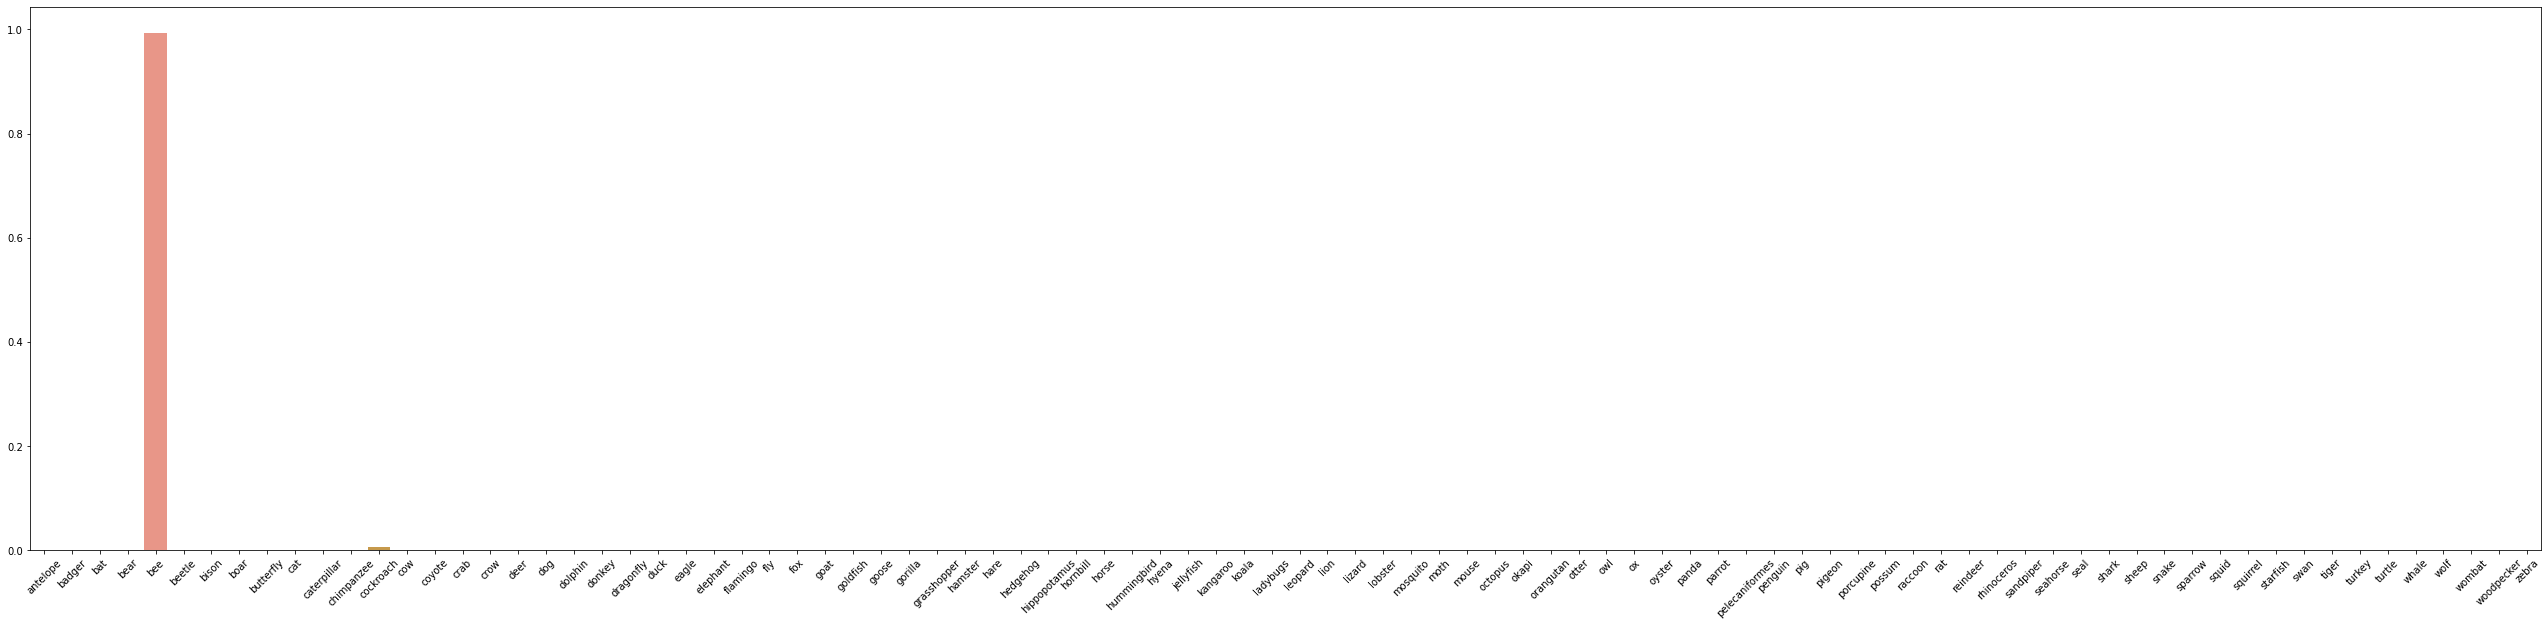

In [229]:
img, label = validation_generator.next()

plt.imshow(img[0] / 255)
plt.show()
print(label[0])

prediction = model.predict(img)

df = pd.DataFrame(prediction, columns=columns)
plt.figure(figsize=(45, 10))
barplot = sns.barplot(data=df.iloc[[0]])

for item in barplot.get_xticklabels():
    item.set_rotation(45)

plt.show()

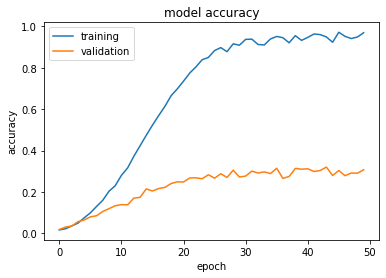

In [231]:
plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'], )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks()
plt.yticks()
plt.legend(['training', 'validation'], loc='upper left',)
plt.show()